In [1]:
import obspy
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy import linalg

### Recording of DAS data

![RecordingofDASdata](RecordingofDASdata.png)

### Stage 11 (One segy)

In [4]:
#Load data (Only one file for Stage 11)
from obspy.io.segy.segy import _read_segy

stream = _read_segy('NNE_MIP3H_v00001_NNE_MW3H_TW3H_S11P_20151110_041204_3_SegyPhase.sgy', headonly=True)

In [5]:
#Traces Information
stream.traces

[Trace sequence number within line: 1
60000 samples, dtype=float32, 2000.00 Hz,
 Trace sequence number within line: 2
60000 samples, dtype=float32, 2000.00 Hz,
 Trace sequence number within line: 3
60000 samples, dtype=float32, 2000.00 Hz,
 Trace sequence number within line: 4
60000 samples, dtype=float32, 2000.00 Hz,
 Trace sequence number within line: 5
60000 samples, dtype=float32, 2000.00 Hz,
 Trace sequence number within line: 6
60000 samples, dtype=float32, 2000.00 Hz,
 Trace sequence number within line: 7
60000 samples, dtype=float32, 2000.00 Hz,
 Trace sequence number within line: 8
60000 samples, dtype=float32, 2000.00 Hz,
 Trace sequence number within line: 9
60000 samples, dtype=float32, 2000.00 Hz,
 Trace sequence number within line: 10
60000 samples, dtype=float32, 2000.00 Hz,
 Trace sequence number within line: 11
60000 samples, dtype=float32, 2000.00 Hz,
 Trace sequence number within line: 12
60000 samples, dtype=float32, 2000.00 Hz,
 Trace sequence number within line: 1

In [6]:
stream

493 traces in the SEG Y structure.

In [7]:
stream.binary_file_header

Binary File Header:
	job_identification_number: 1
	line_number: 1
	reel_number: 1
	number_of_data_traces_per_ensemble: 493
	number_of_auxiliary_traces_per_ensemble: 0
	sample_interval_in_microseconds: 500
	sample_interval_in_microseconds_of_original_field_recording: 500
	number_of_samples_per_data_trace: -5536
	number_of_samples_per_data_trace_for_original_field_recording: -5536
	data_sample_format_code: 1
	ensemble_fold: 493
	trace_sorting_code: 1
	vertical_sum_code: 1
	sweep_frequency_at_start: 0
	sweep_frequency_at_end: 0
	sweep_length: 0
	sweep_type_code: 0
	trace_number_of_sweep_channel: 0
	sweep_trace_taper_length_in_ms_at_start: 0
	sweep_trace_taper_length_in_ms_at_end: 0
	taper_type: 0
	correlated_data_traces: 0
	binary_gain_recovered: 0
	amplitude_recovery_method: 0
	measurement_system: 2
	impulse_signal_polarity: 0
	vibratory_polarity_code: 0
	unassigned_1: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

60000


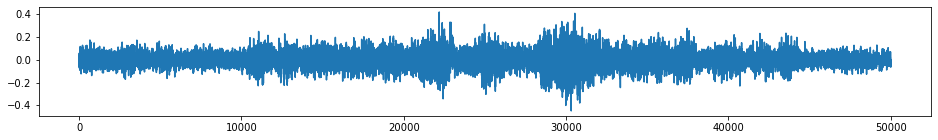

In [8]:
#Individual traces (stream)
trace_pick=0
one_trace = stream.traces[trace_pick]
plt.figure(figsize=(16,2))
print(len(one_trace.data))
set_range1=10000
set_range2=60000
plt.plot(one_trace.data[set_range1:set_range2:1])
plt.show()

In [9]:
#Creating Matrix
n1=50000
n2=493
set_range1=10000
set_range2=60000
data=np.zeros([n2,n1])
for j in range (0,n2):
    at = stream.traces[j]
    at=at.data[set_range1:set_range2:1]
    for i in range (0,n1):
        data[j,i]=at[i]

In [10]:
data=data.T
data.shape

(50000, 493)

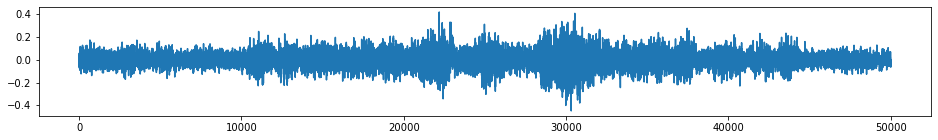

In [11]:
#Individual traces (data)
plt.figure(figsize=(16,2))
set_range1=10000
set_range2=60000
plt.plot(data[:,0])
plt.show()

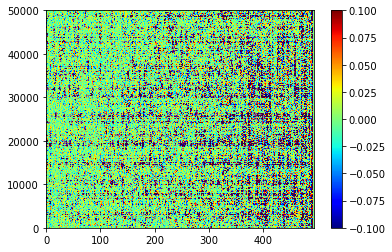

In [12]:
#Plotting of data
plt.pcolormesh(data,cmap='jet',vmin=-0.1,vmax=0.1)
plt.colorbar()
plt.show()

### Applying SVD (One segy)

In [13]:
#Applying SVD
u, s, vh = linalg.svd(data,full_matrices=False)
u.shape, s.shape, vh.shape

((50000, 493), (493,), (493, 493))

In [14]:
#Reconstruction of matrix
k=200
rec_200 = np.matrix(u[:, :k]) * np.diag(s[:k])*np.matrix(vh[:k, :])
rec_200.shape

(50000, 493)

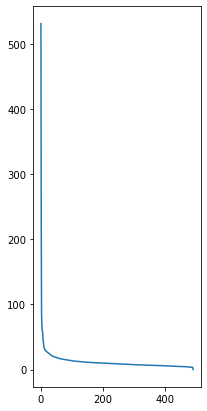

In [15]:
#Plot of SV
plt.figure(figsize=(3,7))
plt.plot(s)
plt.show()

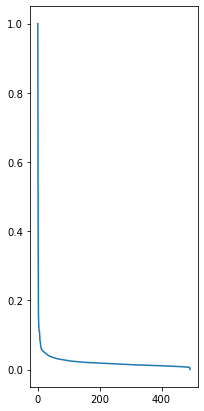

In [16]:
#Plot of normalized SV
sn=s/np.amax(s)
plt.figure(figsize=(3,7))
plt.plot(sn)
plt.show()

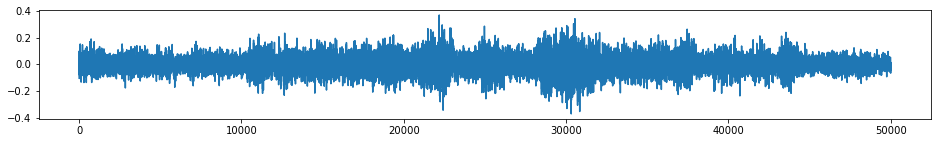

In [17]:
#Individual traces (rec)
plt.figure(figsize=(16,2))
set_range1=10000
set_range2=60000
plt.plot(rec_200[:,0])
plt.show()

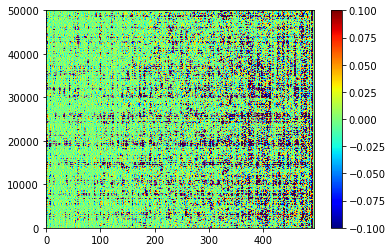

In [18]:
#Plotting of data (reconstruction)
plt.pcolormesh(np.array(rec_200),cmap='jet',vmin=-0.1,vmax=0.1)
plt.colorbar()
plt.show()

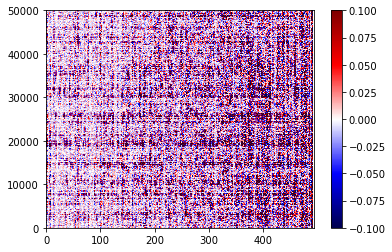

In [19]:
#Plotting of data (reconstruction)
plt.pcolormesh(np.array(rec_200),cmap='seismic',vmin=-0.1,vmax=0.1)
plt.colorbar()
plt.show()

In [20]:
#Reconstruction (Using different sv)
rec_50 = np.matrix(u[:, :50]) * np.diag(s[:50])*np.matrix(vh[:50, :])
rec_100 = np.matrix(u[:, :100]) * np.diag(s[:100])*np.matrix(vh[:100, :])
rec_400 = np.matrix(u[:, :400]) * np.diag(s[:400])*np.matrix(vh[:400, :])

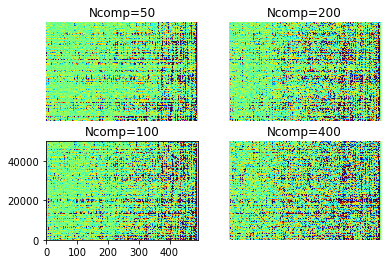

In [21]:
#Plotting of data (reconstruction)
fig, axs = plt.subplots(2, 2)

axs[0, 0].set_title('Ncomp=50')
axs[0, 0].pcolormesh(np.array(rec_50),cmap='jet',vmin=-0.1,vmax=0.1)
axs[0, 0].set_axis_off()

axs[1, 0].pcolormesh(np.array(rec_100),cmap='jet',vmin=-0.1,vmax=0.1)
axs[1, 0].set_title('Ncomp=100')

axs[0, 1].set_title('Ncomp=200')
axs[0, 1].set_axis_off()
axs[0, 1].pcolormesh(np.array(rec_200),cmap='jet',vmin=-0.1,vmax=0.1)

axs[1, 1].pcolormesh(np.array(rec_400),cmap='jet',vmin=-0.1,vmax=0.1)
axs[1, 1].set_title('Ncomp=400')
axs[1, 1].set_axis_off()

plt.show()

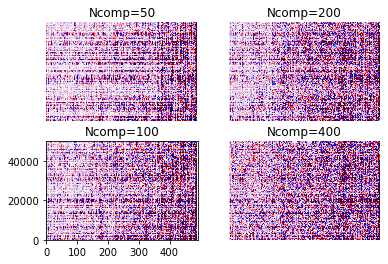

In [22]:
#Plotting of data (reconstruction)
fig, axs = plt.subplots(2, 2)

axs[0, 0].set_title('Ncomp=50')
axs[0, 0].pcolormesh(np.array(rec_50),cmap='seismic',vmin=-0.1,vmax=0.1)
axs[0, 0].set_axis_off()

axs[1, 0].pcolormesh(np.array(rec_100),cmap='seismic',vmin=-0.1,vmax=0.1)
axs[1, 0].set_title('Ncomp=100')

axs[0, 1].set_title('Ncomp=200')
axs[0, 1].set_axis_off()
axs[0, 1].pcolormesh(np.array(rec_200),cmap='seismic',vmin=-0.1,vmax=0.1)

axs[1, 1].pcolormesh(np.array(rec_400),cmap='seismic',vmin=-0.1,vmax=0.1)
axs[1, 1].set_title('Ncomp=400')
axs[1, 1].set_axis_off()

plt.show()

In [23]:
#Compression size
m=rec_200.shape[0]
n=rec_200.shape[1]

comp_size_50=m*50+50+50*n
comp_size_100=m*100+100+100*n
comp_size_200=m*200+200+200*n
comp_size_400=m*200+200+200*n


print('Compression size (50):', comp_size_50)
print('Compression size (100):', comp_size_100)
print('Compression size (200):', comp_size_200)
print('Compression size (400):', comp_size_400)
print('Compression size (Original):', rec_200.size)

Compression size (50): 2524700
Compression size (100): 5049400
Compression size (200): 10098800
Compression size (400): 10098800
Compression size (Original): 24650000


In [24]:
#Compression ratio
print('Compression size ratio (50):', comp_size_50/rec_200.size)
print('Compression size ratio (100):', comp_size_100/rec_200.size)
print('Compression size ratio (200):', comp_size_200/rec_200.size)
print('Compression size ratio (400):', comp_size_400/rec_200.size)

Compression size ratio (50): 0.10242190669371197
Compression size ratio (100): 0.20484381338742394
Compression size ratio (200): 0.4096876267748479
Compression size ratio (400): 0.4096876267748479
